# MULTI-CLASS PREDICTION OF LIVER CIRRHOSIS OUTCOMES.

## PROJECT BY:
* Robinson Musau.
* Kelvin Rotich.

## INTRODUCTION

Welcome to this project on predicting liver cirrhosis outcomes on different patients. In this project we will focus on supervised learning algorithms and choose the best one based on the log-loss metric. This is based on a comprehensive dataset that contains different factors about patients that may or may not lead to one of the outcomes from the disease. 

The main purpose of this project is to create a predictive model that accurately classifies the outcome of a patient after medication. This project aims to provide insights to the medical practicioners and in turn they may be able to get positive outcomes after treating their patients.

In the following sections we will delve into the project's methodology, key findings and the models' performance in predicting liver cirrhosis.

## PROJECT OVERVIEW.

### Liver cirrhosis background.

Liver cirrhosis involves progressive scarring of the liver, often caused by factors like chronic alcohol abuse, viral hepatitis, or fatty liver disease. Treatment strategies vary based on the underlying cause. Lifestyle changes, such as alcohol cessation or weight management are crucial. Medications may be prescribed to manage symptoms and address specific causes. In advanced cases, liver transplants might be considered as a viable option. Regular medication monitoring and adherence to prescribed treatments are essential for managing liver cirrhosis effectively.

### Challenges caused by liver cirrhosis.

Liver cirrhosis posses various challenges due to its impact on liver function. Patients often experience complications like ascites, which is the fluid buildup in the abdomen, brain dysfunction and increased vulnerability to infections. The compromised liver function affects blood clotting, leading to easy bruising and bleeding. Malnutrition can also occur as the liver stuggles to process nutrients, contributing to muscle wasting and weakness. Additionally, cirrhosis increases the risk of liver cancer. 

### Solutions to mitigate liver cirrhosis.

Mitigating liver cirrhosis involves addressing underlying causes and managing complications. Lifestyle changes play a major role, including alcohol abstinence for those with alcohol cirrhosis and adopting a healthy diet to manage non-alcoholic fatty liver disease. Antiviral medication can help control viral hepatitis, and weight managememt is vital for those with obesity-related liver disease. Medications may be prescribed to manage symptoms and complications. In some cases, liver transplants become a viable option for viable cirrhosis. Regular medical check-ups, vaccination against hepatitis and early intervention are key components of a comprehensive strategy to mitigate liver cirrhosis.

### Problem statement.

The challenge of predicting liver cirrhosis outcomes involve developing a robust predictive model capable of accurately categorizing patients into their outcomes of the disease. This task requires addressing challenges such as the diverse etiology of cirrhosis, varying progression rates and presence of multiple complications. Achieving accurate predictions neccesitates comprehensive data integration, considering clinical, laboratory and imaging variables. Additionally, the model should account for the dynamic measure of cirrhosis and potential shifts in patient status over time. The developement of an effective predicting system for liver cirrhosis outcomes is crucial for personalized treatment strategies and timely interventions to improve patient outcomes.

### Importing the necessary libraries.

In [38]:
# Importing libraries.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score, log_loss
import joblib

## DATA UNDERSTANDING.

The two datasets used for this project were acquired from `Kaggle.com`. We will now take a look at the components of the datasets.

In [2]:
# Function to load and examine the training dataset
def load_and_examine_data(file_path):
    try:
        # Load the data from the specified file path
        data = pd.read_csv(file_path)
        # Display the shape, columns and the first few rows of the dataset
        print("----------------------------Details about the data----------------------------\n")
        print("----------------------------Shape of the dataset----------------------------\n")
        display(data.shape)
        print()
        print("----------------------------Columns of the dataset----------------------------\n")
        display(data.columns)
        print()
        print("----------------------------Head of the dataset----------------------------\n")
        display(data.head())
        print()
        # Display information about the dataset
        print("\n----------------------------Data information ----------------------------\n")
        display(data.info())
        print("\n----------------------------Descriptive Statistics of the dataset ----------------------------\n")
        display(data.describe())
        return data
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
# Replacing with the data file path
file_path = 'train.csv'
train_data = load_and_examine_data(file_path)

----------------------------Details about the data----------------------------

----------------------------Shape of the dataset----------------------------



(7905, 20)


----------------------------Columns of the dataset----------------------------



Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')


----------------------------Head of the dataset----------------------------



,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C




----------------------------Data information ----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905

None


----------------------------Descriptive Statistics of the dataset ----------------------------



,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [3]:
# Loading the test dataset

file_path = 'test.csv'
test_data = load_and_examine_data(file_path)

----------------------------Details about the data----------------------------

----------------------------Shape of the dataset----------------------------



(5271, 19)


----------------------------Columns of the dataset----------------------------



Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


----------------------------Head of the dataset----------------------------



,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0




----------------------------Data information ----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271

None


----------------------------Descriptive Statistics of the dataset ----------------------------



,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000
mean,10540.000000,2038.696642,18497.756782,2.600389,352.486435,3.538071,84.701679,1811.233314,113.587526,115.286094,264.023715,10.632865,3.036995
std,1521.750965,1086.843490,3583.898801,3.852395,200.438989,0.354886,77.542064,1935.351492,48.964789,52.602780,87.584068,0.792711,0.856030
min,7905.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,9222.500000,1234.000000,15730.000000,0.700000,248.000000,3.350000,39.000000,823.000000,75.000000,84.000000,209.000000,10.000000,2.000000
50%,10540.000000,1882.000000,18806.000000,1.100000,299.000000,3.570000,65.000000,1142.000000,106.950000,104.000000,259.000000,10.600000,3.000000
75%,11857.500000,2692.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1838.500000,137.950000,138.000000,317.000000,11.000000,4.000000
max,13175.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,15.200000,4.000000


From the training dataset, we can see that we have a dataset with 7905 rows and 20 columns. The test dataset has 5271 rows and 19 columns. The one column missing is the `Status` column which will be determined by the model we create. 

Additional column information:
* `id`: Patient id.
* `N_days`: Number of days the patient is on treatment.
* `Drug`: Type of drug the patient used for treatment.
* `Age`: Age of the patient in days.
* `Sex`: Gender of the patient.
* `Ascites`: If the patient has ascites(the condition in which fluids collect in spaces within their abdomen) or not.
* `Hepatomegaly`: If the patient has hepatomegaly(their liver is enlarged beyond normal size) or not.
* `Spiders`: If the patient has spider nevi(a common sign of liver disease) or not.
* `Edema`: If the patient has edema(a swollen liver) or not.
* `Bilirubin`: Levels of bilirubin(yellowish pigment made during the breakdown of red blood cells) in the patient's body.
* `Cholesterol`: Levels of cholesterol in the patient's body.
* `Albumin`: Levels of albumin(a protein made by the liver) in the patient's body.
* `Copper`: Levels of copper in the patient's body.
* `Alk_phos`: Levels of alkaline phosphate in the patient's body.
* `SGOT`: SGOT medical test scores. This was used to determine whether the liver was damaged.
* `Tryglicerides`: Levels of truglicerides(a type of fat in the blood) in the patient's body.
* `Platelets`: Levels of platelets in the patient's body.
* `Prothrombin`: Levels of prothrombin(A protein made by the liver) in the patient's body.
* `Stage`: The cirrhosis stage the patient is in.
* `Status`: is the categorical target; `C` (censored) indicates the patient was alive at `N_Days`, `CL` indicates the patient was alive at `N_Days` due to a liver transplant, and `D` indicates the patient was deceased at `N_Days`. 

## DATA PREPARATION.

In [4]:
# Combine the DF for cleaning 
train_data_status = train_data['Status']
train_data = train_data.drop('Status', axis=1)


In [5]:
combined_df = pd.concat([train_data, test_data])

In [6]:
combined_df.shape

(13176, 19)

In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13176 non-null  int64  
 1   N_Days         13176 non-null  int64  
 2   Drug           13176 non-null  object 
 3   Age            13176 non-null  int64  
 4   Sex            13176 non-null  object 
 5   Ascites        13176 non-null  object 
 6   Hepatomegaly   13176 non-null  object 
 7   Spiders        13176 non-null  object 
 8   Edema          13176 non-null  object 
 9   Bilirubin      13176 non-null  float64
 10  Cholesterol    13176 non-null  float64
 11  Albumin        13176 non-null  float64
 12  Copper         13176 non-null  float64
 13  Alk_Phos       13176 non-null  float64
 14  SGOT           13176 non-null  float64
 15  Tryglicerides  13176 non-null  float64
 16  Platelets      13176 non-null  float64
 17  Prothrombin    13176 non-null  float64
 18  Stage  

In [8]:
cat_columns = combined_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [9]:

mapper_dict = {}  # Dictionary to store mapping dictionaries for each column

for col in cat_columns:
    categories = combined_df[col].unique()  # Get unique categories in the column
    mapper = {category: index for index, category in enumerate(categories)}  # Create mapping dictionary
    mapper_dict[col] = mapper  # Store the mapping dictionary for the column

# mapper_dict will contain mapping dictionaries for each categorical column


In [10]:
mapper_dict

{'Drug': {'D-penicillamine': 0, 'Placebo': 1},
 'Sex': {'M': 0, 'F': 1},
 'Ascites': {'N': 0, 'Y': 1},
 'Hepatomegaly': {'N': 0, 'Y': 1},
 'Spiders': {'N': 0, 'Y': 1},
 'Edema': {'N': 0, 'Y': 1, 'S': 2}}

In [11]:


for col, mapper in mapper_dict.items():
    combined_df[col] = combined_df[col].map(mapper)  # Map categorical values to numeric values using the mapper




In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13176 non-null  int64  
 1   N_Days         13176 non-null  int64  
 2   Drug           13176 non-null  int64  
 3   Age            13176 non-null  int64  
 4   Sex            13176 non-null  int64  
 5   Ascites        13176 non-null  int64  
 6   Hepatomegaly   13176 non-null  int64  
 7   Spiders        13176 non-null  int64  
 8   Edema          13176 non-null  int64  
 9   Bilirubin      13176 non-null  float64
 10  Cholesterol    13176 non-null  float64
 11  Albumin        13176 non-null  float64
 12  Copper         13176 non-null  float64
 13  Alk_Phos       13176 non-null  float64
 14  SGOT           13176 non-null  float64
 15  Tryglicerides  13176 non-null  float64
 16  Platelets      13176 non-null  float64
 17  Prothrombin    13176 non-null  float64
 18  Stage  

In [13]:
combined_df.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [14]:
combined_df.duplicated().any()

False

## Feature Engineering

### Liver Health Score

### General Weighting Considerations:
#### Bilirubin:

Bilirubin levels reflect the liver's ability to process waste. Elevated levels often indicate liver dysfunction.
Weight: High (e.g., 0.4 to 0.5)

#### Albumin:
Albumin is a key protein produced by the liver. Low levels can indicate liver damage.
Weight: Moderate to High (e.g., 0.3 to 0.4)

#### SGOT (AST - Aspartate Aminotransferase):
Elevated SGOT levels indicate liver cell damage but can also arise from other conditions.
Weight: Moderate (e.g., 0.2 to 0.3)

#### Prothrombin Time:
Prothrombin measures the time it takes for blood to clot. Elevated levels might indicate liver damage affecting blood clotting.
Weight: Moderate (e.g., 0.1 to 0.2)

In [15]:
weight_bilirubin = 0.45
weight_albumin = 0.35
weight_sgot = 0.25
weight_prothrombin = 0.15
df = combined_df

# Calculate the composite score
df['Liver_Health_Score'] = (
    df['Bilirubin'] * weight_bilirubin +
    df['Albumin'] * weight_albumin +
    df['SGOT'] * weight_sgot +
    df['Prothrombin'] * weight_prothrombin
)

# Drop the individual biomarker columns
biomarker_columns = ['Bilirubin', 'Albumin', 'SGOT', 'Prothrombin']
df.drop(columns=biomarker_columns, inplace=True)




### Symptom Severity Score
#### Ascites:
Ascites refers to the accumulation of fluid in the abdomen, often a sign of advanced liver disease.
Weight: High (e.g., 0.4 to 0.5)

#### Hepatomegaly:
Hepatomegaly indicates an enlarged liver, a common sign of liver disease or inflammation.
Weight: Moderate to High (e.g., 0.3 to 0.4)

#### Spiders (Spider Nevus):
Spider nevi are small, dilated blood vessels near the surface of the skin, often associated with liver disease.
Weight: Moderate (e.g., 0.2 to 0.3)
#### Edema:
Edema signifies fluid retention, which can occur in advanced liver disease.
Weight: Moderate to Low (e.g., 0.1 to 0.2)

In [16]:
weight_ascites = 0.45
weight_hepatomegaly = 0.35
weight_spiders = 0.25
weight_edema = 0.15

# Calculate the composite symptom severity score
df['Symptom_Severity_Score'] = (
    df['Ascites'] * weight_ascites +
    df['Hepatomegaly'] * weight_hepatomegaly +
    df['Spiders'] * weight_spiders +
    df['Edema'] * weight_edema
)
# Drop the individual symptom columns
symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
df.drop(columns=symptom_columns, inplace=True)

#### Spliting the DF again

In [17]:
# Assuming you have the original lengths of train_data and test_data
train_length = len(train_data)
test_length = len(test_data)

# Split the combined_df back into train and test
train_df = combined_df.iloc[:train_length]
test_df = combined_df.iloc[train_length:train_length + test_length]


In [18]:
train_df['Status'] = train_data_status


In [19]:
train_df.shape

(7905, 14)

In [20]:
test_df.shape

(5271, 13)

### Checking for outliers

We will create boxplots and use a function to check for outliers in our dataset.

In [21]:
# Creating a function that checks for outliers in a dataset.
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr
        # Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]
        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

# Checking for outliers in the train dataset
columns_to_check = train_df.select_dtypes(include = ['number'])
check_outliers(train_df, columns_to_check)

id
Number of outliers: 0

N_Days
Number of outliers: 0

Drug
Number of outliers: 0

Age
Number of outliers: 36

Sex
Number of outliers: 569

Cholesterol
Number of outliers: 502

Copper
Number of outliers: 655

Alk_Phos
Number of outliers: 792

Tryglicerides
Number of outliers: 267

Platelets
Number of outliers: 114

Stage
Number of outliers: 0

Liver_Health_Score
Number of outliers: 147

Symptom_Severity_Score
Number of outliers: 460



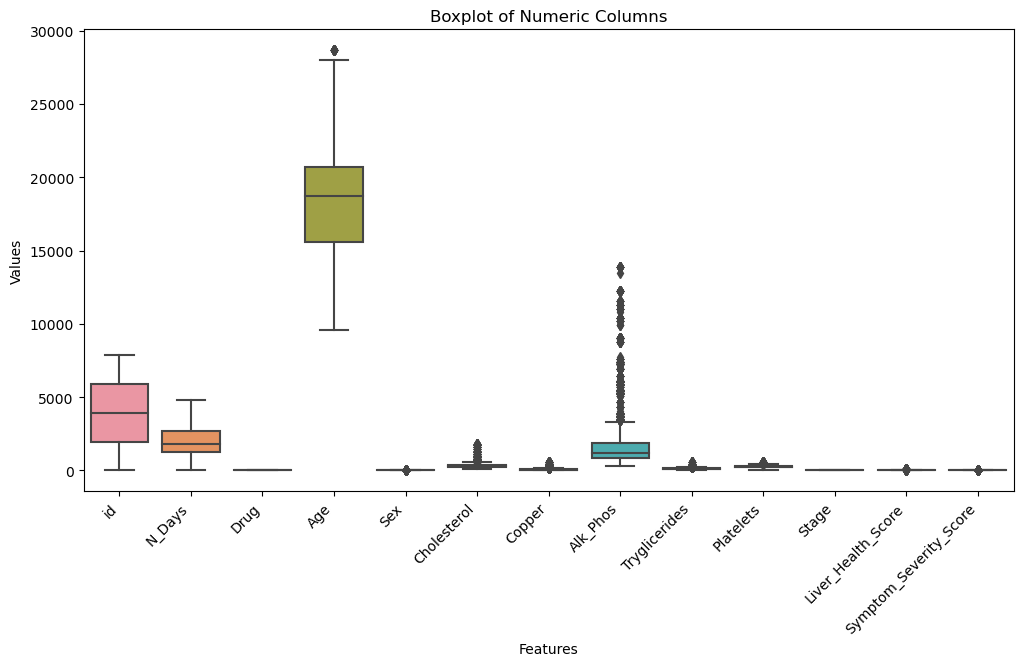

In [22]:
# Plotting a boxplot to check for outliers in the train dataset
features_to_plot = train_df.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

In [23]:
# Checking for outliers in the test dataset
columns_to_check = test_df.select_dtypes(include = ['number'])
check_outliers(test_df, columns_to_check)

id
Number of outliers: 0

N_Days
Number of outliers: 0

Drug
Number of outliers: 0

Age
Number of outliers: 19

Sex
Number of outliers: 394

Cholesterol
Number of outliers: 355

Copper
Number of outliers: 453

Alk_Phos
Number of outliers: 552

Tryglicerides
Number of outliers: 190

Platelets
Number of outliers: 66

Stage
Number of outliers: 0

Liver_Health_Score
Number of outliers: 110

Symptom_Severity_Score
Number of outliers: 297



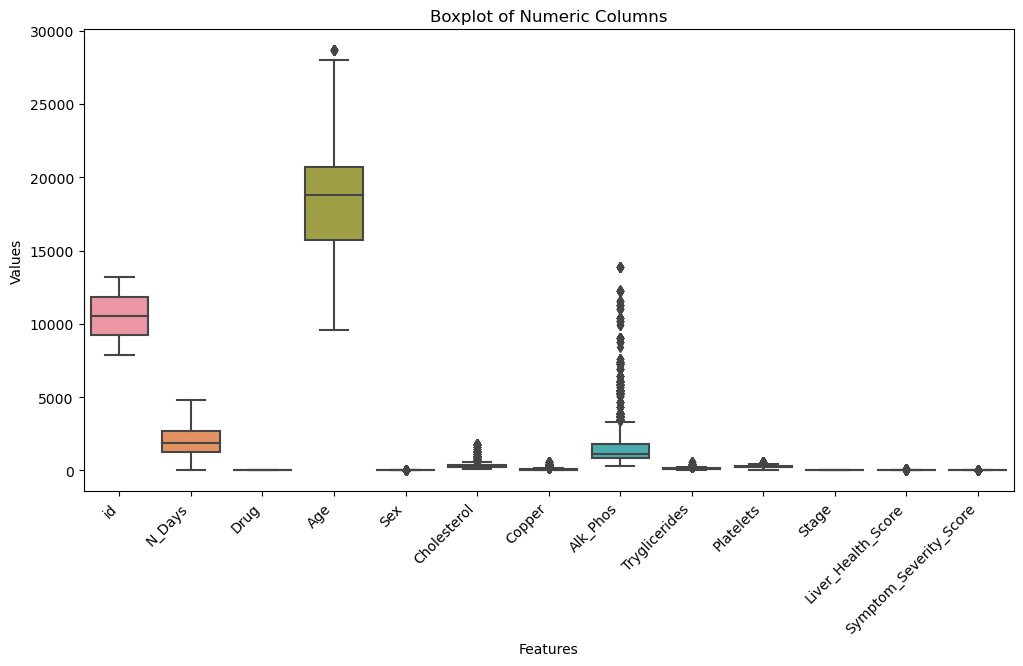

In [24]:
# Plotting a boxplot to check for outliers in the test dataset
features_to_plot = test_df.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

Based on the results, we can see that there are outliers present. However, we cannot drop them since they were genuine events recorded by the data collecting team. We can now go to the EDA part.

## EXPLORATORY DATA ANALYSIS.

### Univariate Analysis

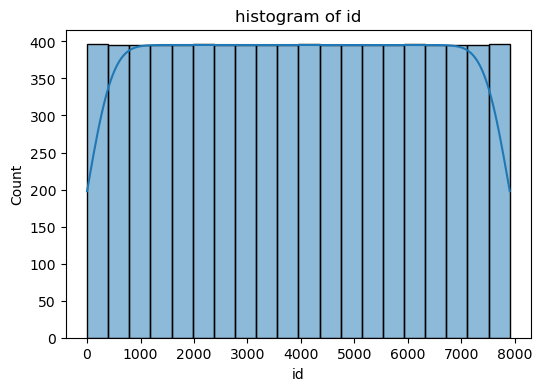

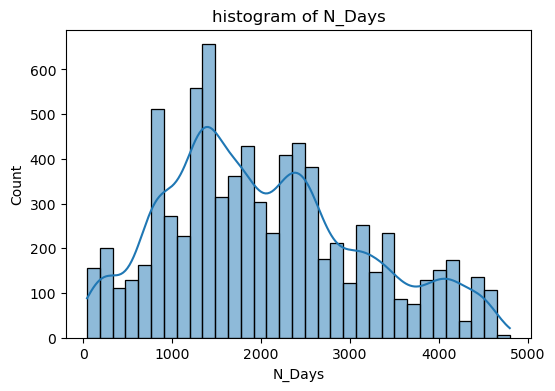

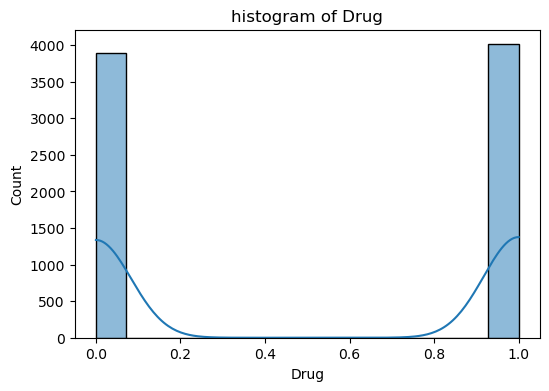

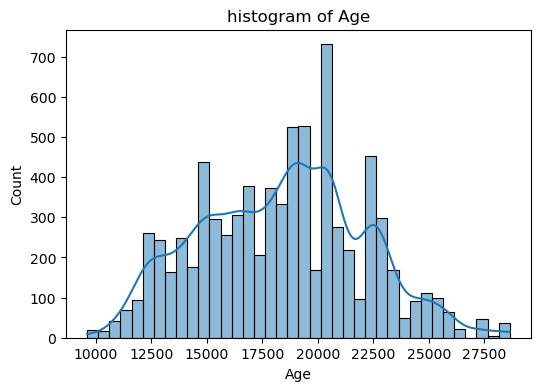

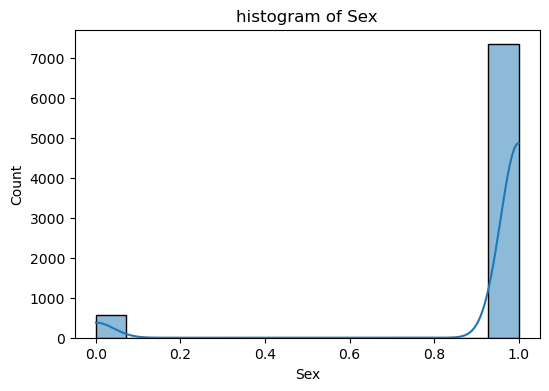

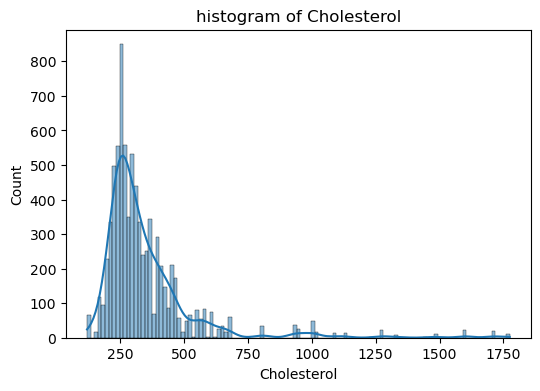

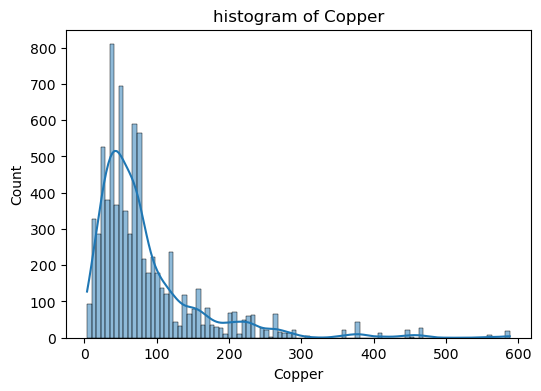

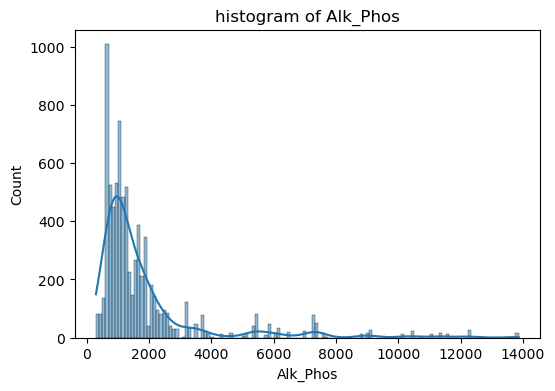

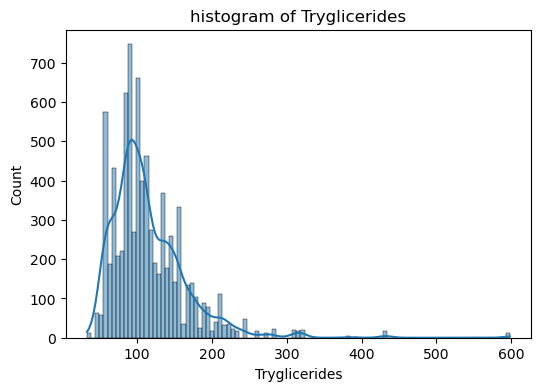

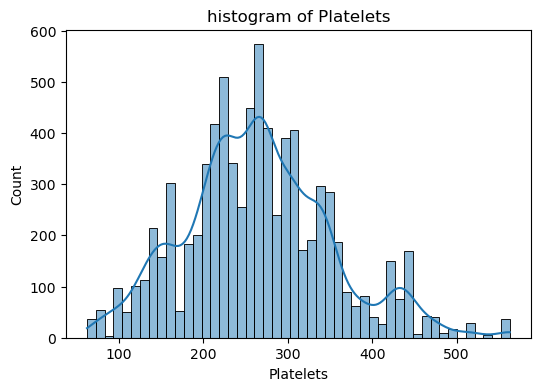

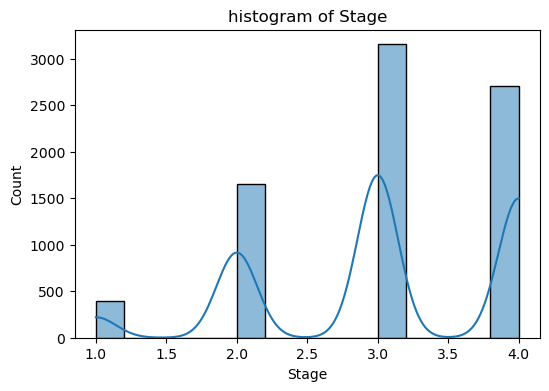

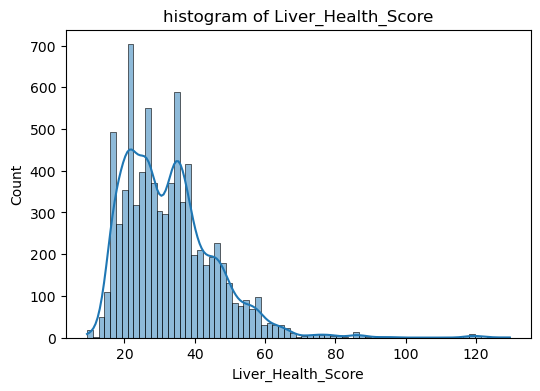

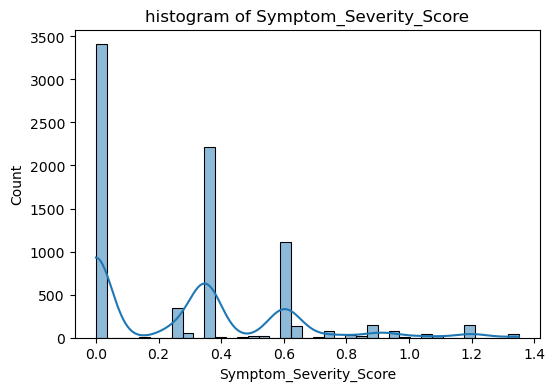

In [25]:
# Creating histograms for selected columns in the train dataset
# Identify numerical columns
numeric_train = train_df.select_dtypes(include=['number'])
# Iterate over numerical columns and create histograms
for column in numeric_train.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numeric_train, x=column, bins = 'auto', common_norm = False, kde
    = True)
    plt.title(f"histogram of {column}")
    plt.show()

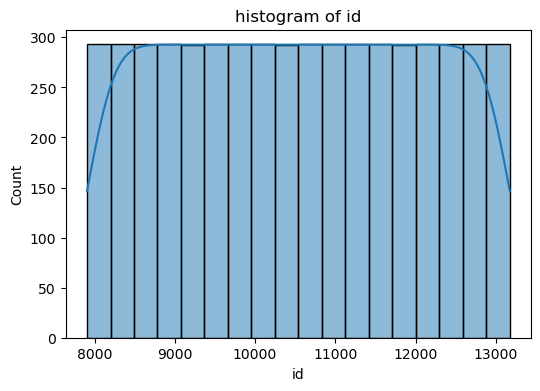

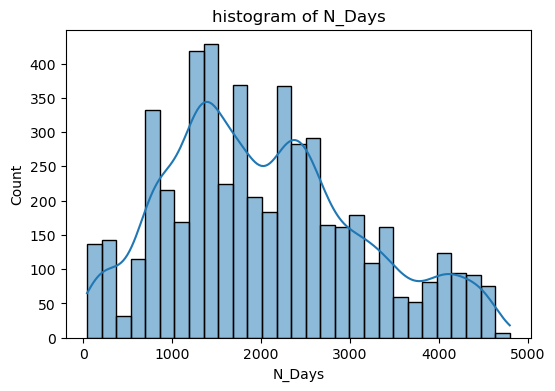

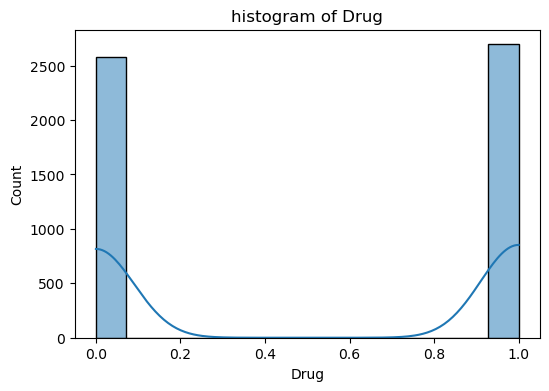

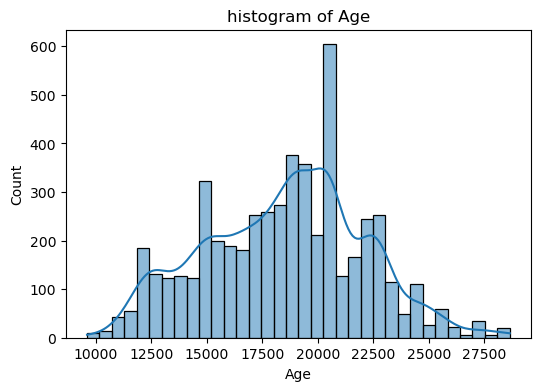

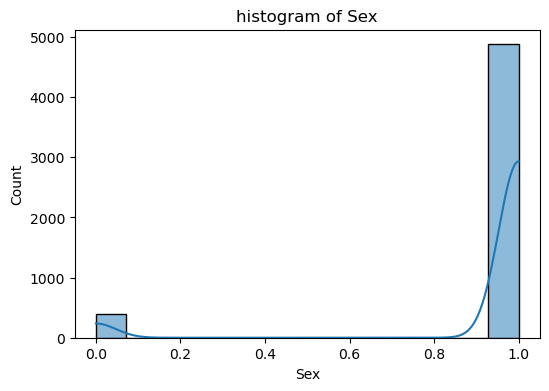

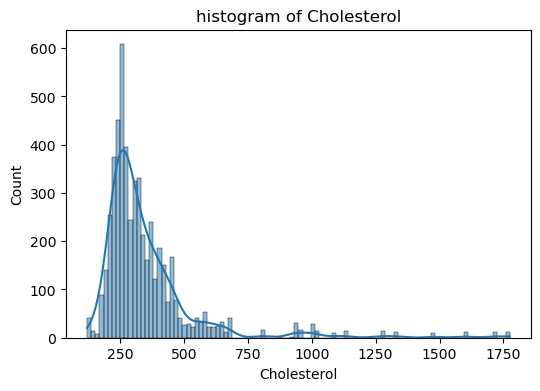

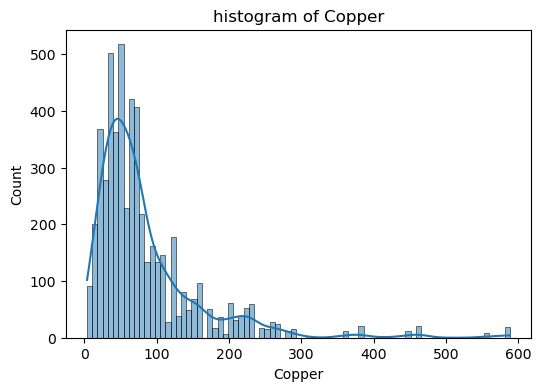

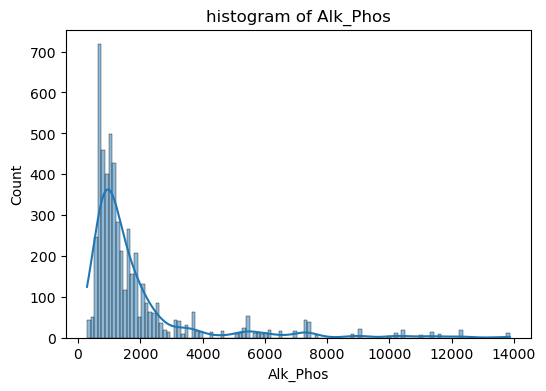

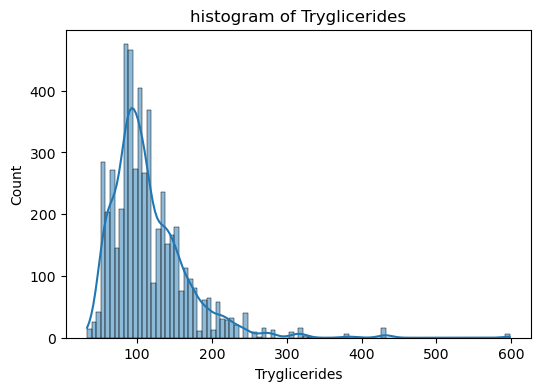

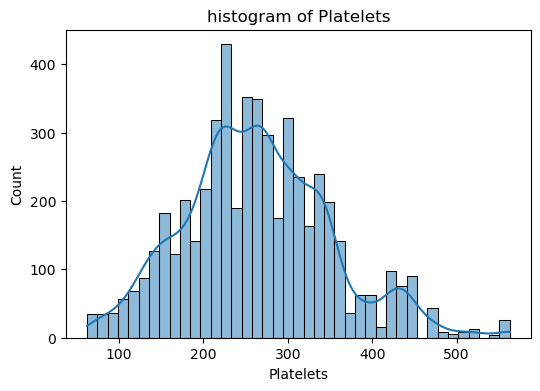

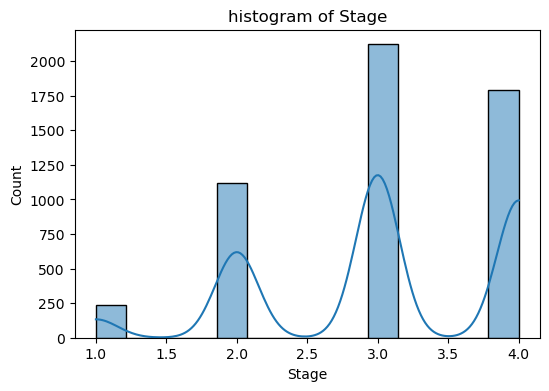

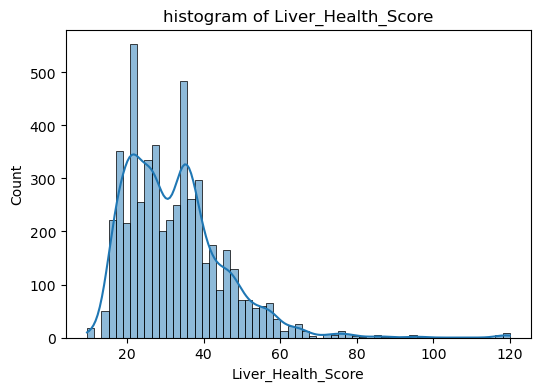

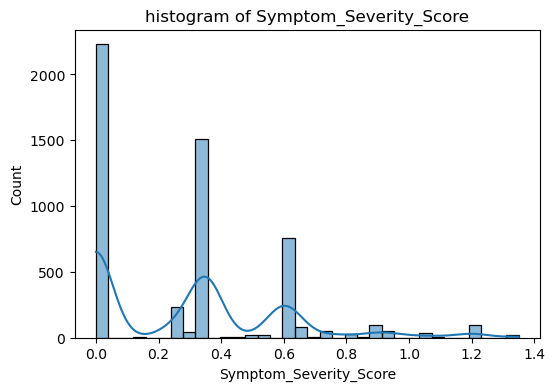

In [26]:
# Creating histograms for selected columns in the test dataset
# Identify numerical columns
numeric_test = test_df.select_dtypes(include=['number'])
# Iterate over numerical columns and create histograms
for column in numeric_test.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numeric_test, x=column, bins = 'auto', common_norm = False, kde
    = True)
    plt.title(f"histogram of {column}")
    plt.show()

From the histograms of both datasets, we can see that most of the columns have somewhat of a discrete distribution. We can also see that for those with continous distributions, all of them except the `Age`, `n_days` and the `platelets` columns, which are somehow normally distributed, have a positive skew. It can also be seen that the `id` histogram does not make a lot of sense. We will have to drop the `id`  from both datasets.

In [27]:
# Dropping id column in both datasets
numeric_train = numeric_train.drop(['id'], axis=1)

numeric_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 0 to 7904
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N_Days                  7905 non-null   int64  
 1   Drug                    7905 non-null   int64  
 2   Age                     7905 non-null   int64  
 3   Sex                     7905 non-null   int64  
 4   Cholesterol             7905 non-null   float64
 5   Copper                  7905 non-null   float64
 6   Alk_Phos                7905 non-null   float64
 7   Tryglicerides           7905 non-null   float64
 8   Platelets               7905 non-null   float64
 9   Stage                   7905 non-null   float64
 10  Liver_Health_Score      7905 non-null   float64
 11  Symptom_Severity_Score  7905 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 1.0 MB


In [28]:
numeric_test = numeric_test.drop(['id'], axis=1)

numeric_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5271 entries, 0 to 5270
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N_Days                  5271 non-null   int64  
 1   Drug                    5271 non-null   int64  
 2   Age                     5271 non-null   int64  
 3   Sex                     5271 non-null   int64  
 4   Cholesterol             5271 non-null   float64
 5   Copper                  5271 non-null   float64
 6   Alk_Phos                5271 non-null   float64
 7   Tryglicerides           5271 non-null   float64
 8   Platelets               5271 non-null   float64
 9   Stage                   5271 non-null   float64
 10  Liver_Health_Score      5271 non-null   float64
 11  Symptom_Severity_Score  5271 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 664.4 KB


We can now have a look at how our categorical columns are distributed. 

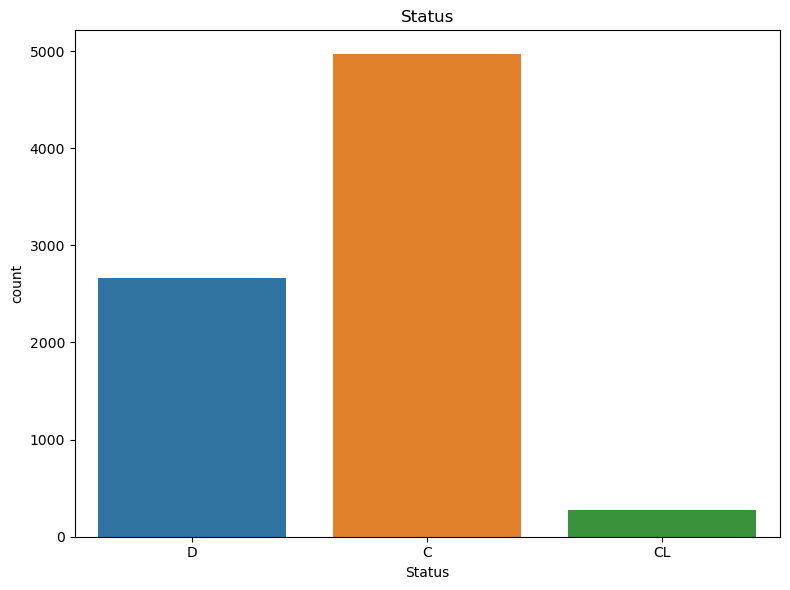

In [29]:
# Creating the countplot
# Create a figure with a grid of subplots
fig, ax = plt.subplots(figsize=(8, 6))
# Iterate over categorical columns and create countplots
sns.countplot(data=train_df, x=train_df['Status'], ax=ax)
ax.set_title('Status')
# Show the plot
plt.tight_layout()
plt.show();

From the countplot we can see that there is a bit of class imbalance in the dataset. Most of the patients survived after treatment. We can also see that a lot of them passed on due to the illness. A few of them survived after undergoing a liver transplant. This imbalance will be sorted in the second data preprocessing part. We can now go ahead and conduct bivariate analysis.

### Bivariate Analysis.

Here, we will compare how the features relate to the target variable in the train dataset by using boxplots.

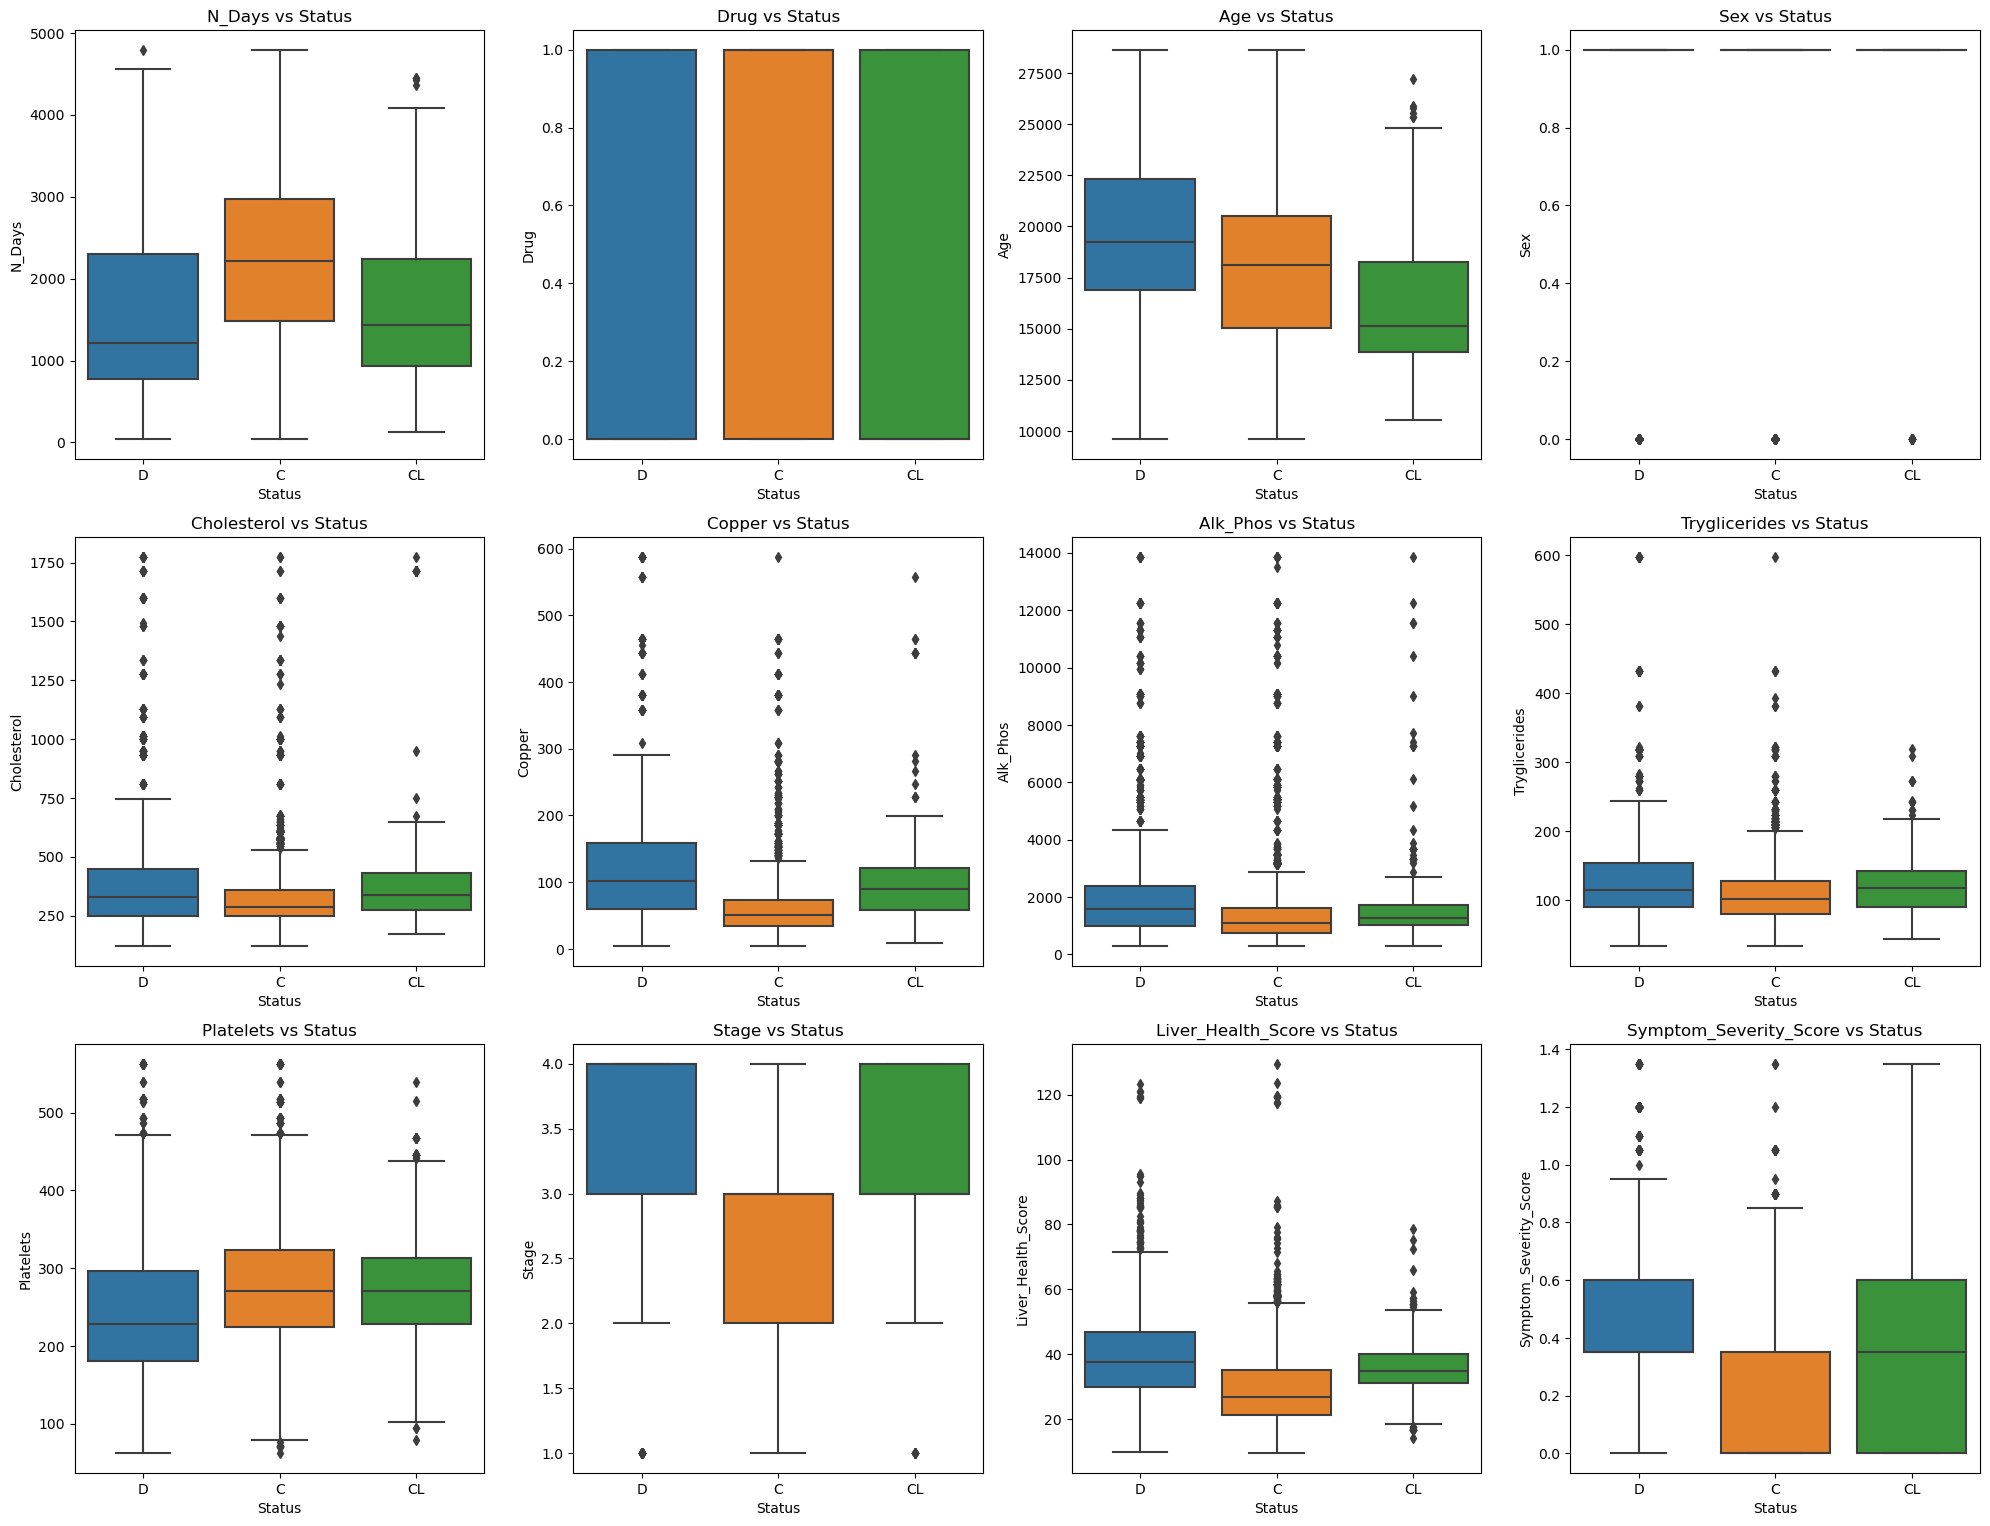

In [31]:
# PLotting boxplots

plt.figure(figsize=(20,20))
for i, column in enumerate(numeric_train):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='Status', y=column, data=train_df)
    plt.title(f'{column} vs Status')

plt.tight_layout()
plt.show();

From the boxplots we can note that:

* The deceased patients underwent treatment for fewer days than those who survived and those who survived with a liver transplant. We can also see that those who survived with the transplant also underwent fewer days of treatment compared to those who survived without the treatment.
* The boxplot that compares drug used and status is not conclusive enough and we will conduct a test to check the relationship.
* The median age of the deceased patients is higher than those of the other classes. That of those who survived after undergoing a liver transplant is lower compared to those who survived without the liver transplant.
* It seems that most of the patients for each class were female.
* The median cholesterol levels for the deceased patients and those who survived after a transplant were somewhat the same and they were higher than that of patients who survived without the transplant.
* The median copper levels for the deceased patients and those who survived after a transplant were somewhat the same and they were higher than that of patients who survived without the transplant.
* The median alkaline phosphate levels for the patients who survived without the transplant and those who survived after a transplant were almost the same and they were slightly lower than that of the deceased patients.
* The median tryglicerides levels for the deceased patients and those who survived after a transplant were somehow the same and they were higher than that of patients who survived without the transplant.
* The median platelet levels for the patients who survived without the transplant and those who survived after a transplant were the same and they were higher than that of the deceased patients.
* The median stage for the deceased patients and those who survived after a transplant were somewhat the same and they were higher than that of patients who survived without the transplant.
* The median liver health scores for the deceased patients and those who survived after a transplant were somewhat the same and they were higher than that of patients who survived without the transplant.
* The severity scores for the patients was higher for the deceased and the patients who survived due to a transplant than those of the patients who survived without the transplant.

We can now conduct a statistical test to see the relationship between the drug and the status of the patients. Since we are comparing a numerical feature with a categorical target, we will use the one-way ANOVA test and use an alpha value of 0.05.  

In [35]:
# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(train_df['Drug'][train_df['Status'] == 'D'],
                                      train_df['Drug'][train_df['Status'] == 'C'],
                                      train_df['Drug'][train_df['Status'] == 'CL'])

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 2.9417971133268956
P-value: 0.05282860522587207


From the p-value obtained above, we can see that it is just slightly above 0.05. It means that if there were truly no difference in means across the groups, we'd observe an F-statistic as extreme as 2.9418 about 5.28% of the time. This is not a very low probability, so we cannot definitively conclude that there is a significant difference in means. This in our case means that we cannote conclusively state that the D-penicillamine drug performs better than the placebo drug.

With that we can conduct the multivariate analysis.

### Multivariate analysis.

We will take a look at the relationships of each numerical features in both datasets by using heatmaps.

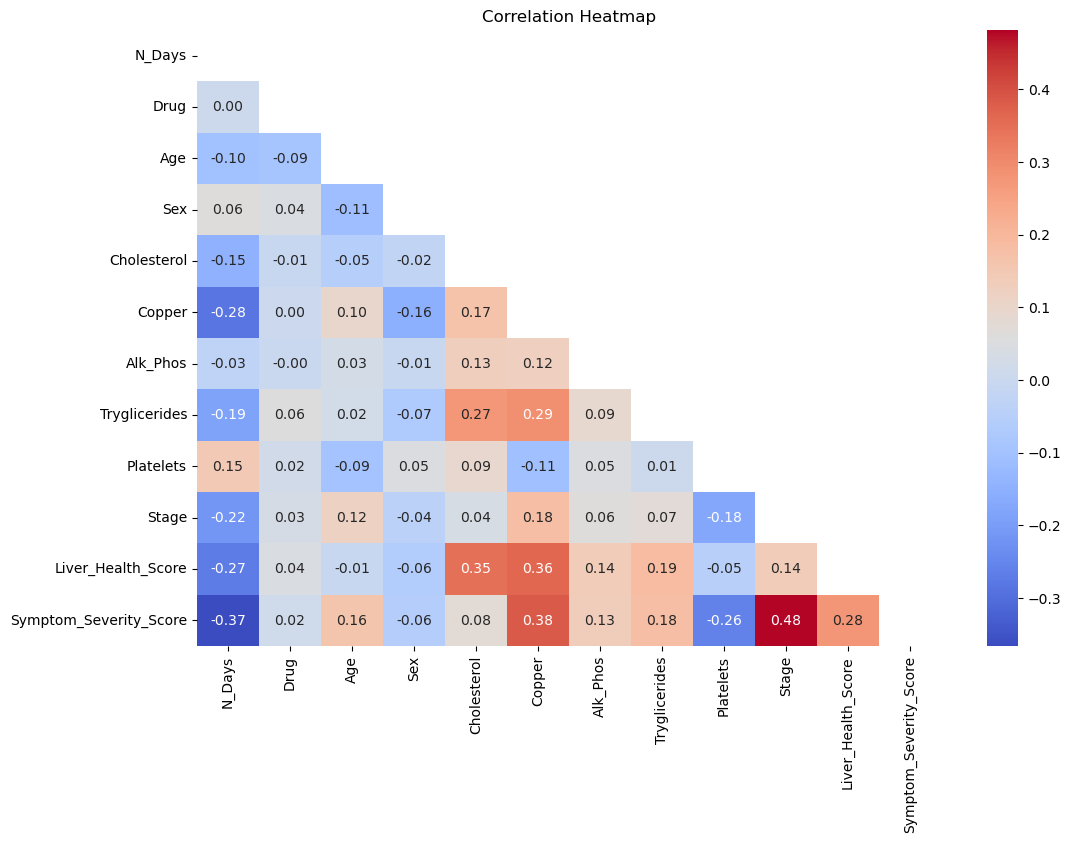

In [36]:
# Creating a correlation matrix for the train dataset
correlation_matrix = numeric_train.corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,)
plt.title('Correlation Heatmap')
plt.show();

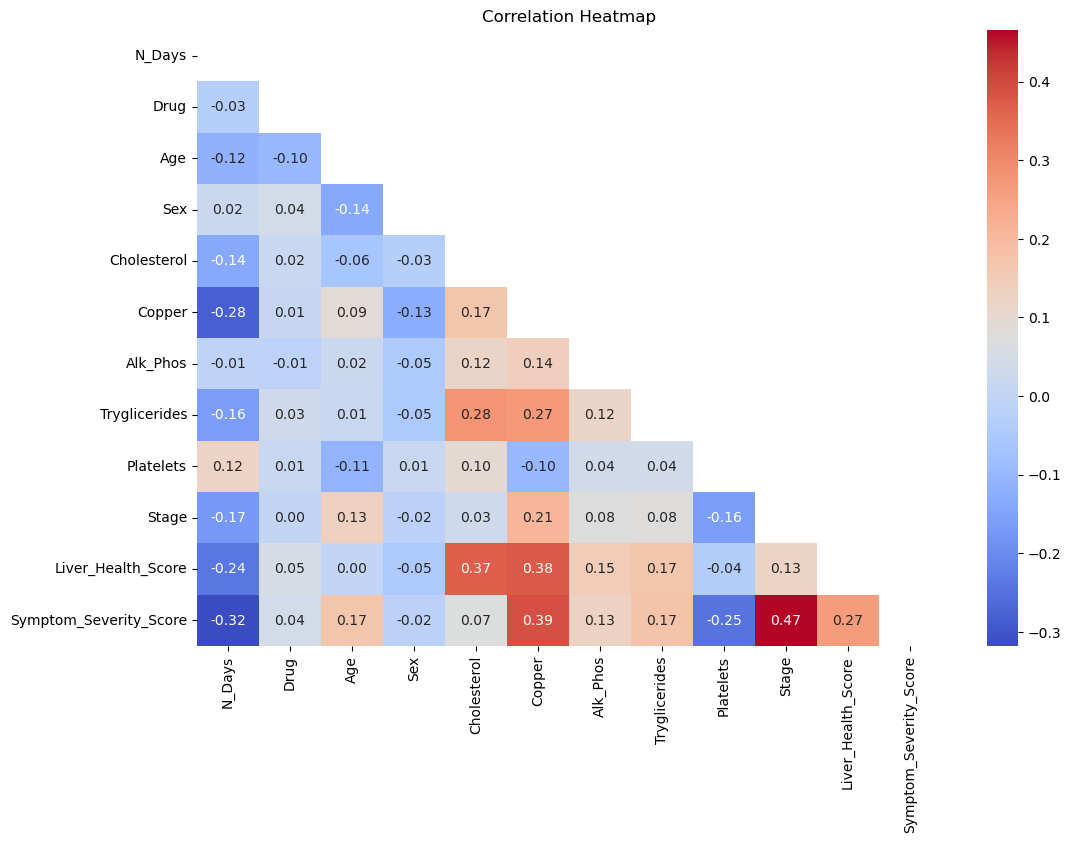

In [37]:
# Creating a correlation matrix for the test dataset
correlation_matrix = numeric_test.corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,)
plt.title('Correlation Heatmap')
plt.show();

From both heatmaps, we can see that most of our features have weak correlation values with 0.48 being the highest correlation in the train dataset, 0.47 being the highest in the test dataset, -0.37 being the lowest in the train dataset and -0.32 being the lowest in the test dataset. This means that there will be no issues of autocorrelation in our dataset during the modelling process. We can now go to the first step of the modelling stage; data preprocessing.

## MODELLING.

### Data preprocessing.

We will use SelectKBest for feature selection.

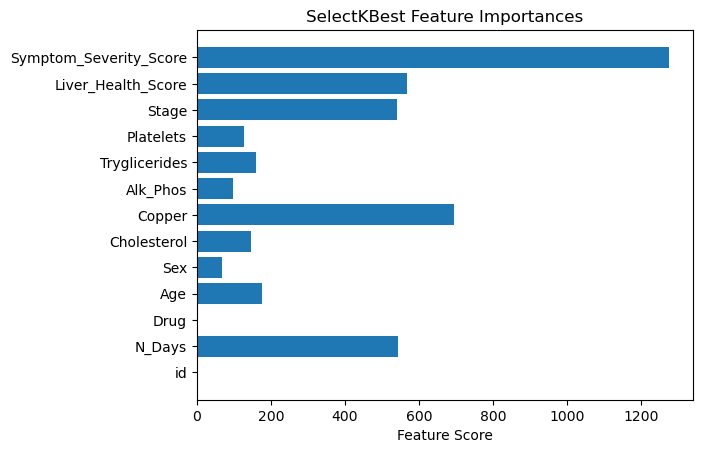

In [42]:
# Splitting train_df into X and y
X = train_df.drop(['Status'], axis=1)
y = train_df['Status']

# Fitting SelectKBest
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X, y)
feature_scores = selector.scores_
feature_names = X.columns

# Creating a bar chart to show importance.
plt.barh(feature_names, feature_scores)
plt.xlabel('Feature Score')
plt.title('SelectKBest Feature Importances')
plt.show()

From the bar chart we can see that most of the columns have somewhat of an importance save for `Drug` and `id`. This means that we will drop them from our model.

In [44]:
# Dropping the id and drug columns
X = X.drop(['id', 'Drug'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 0 to 7904
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N_Days                  7905 non-null   int64  
 1   Age                     7905 non-null   int64  
 2   Sex                     7905 non-null   int64  
 3   Cholesterol             7905 non-null   float64
 4   Copper                  7905 non-null   float64
 5   Alk_Phos                7905 non-null   float64
 6   Tryglicerides           7905 non-null   float64
 7   Platelets               7905 non-null   float64
 8   Stage                   7905 non-null   float64
 9   Liver_Health_Score      7905 non-null   float64
 10  Symptom_Severity_Score  7905 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 999.1 KB


Since most of our data engineering was done during data preparation, we will now go ahead and split the data into train and test datasets. We will use a `70/30` split and a `random_state` of 42.

In [45]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Since we noticed class imbalance in the `Status` column, we will use `SMOTE` to mitigate the issue and conduct another split using the same conditions.

In [46]:
# Mitigating the class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Conduct another split
X_train_resampled, X_val, y_train_resampled, y_val = train_test_split(X_resampled, y_resampled,
                                                                      test_size=0.3, 
                                                                      random_state=42)

Since our data is ready for modelling, we will create functions that will help in model evaluation.

In [47]:
# Creating the function
# Confusion matrix
def confusion_matrix_metrics(y_true, y_pred, model):
    cf = confusion_matrix(y_true, y_pred)
    labels = model.classes_
    plt.figure(figsize=(8,6))
    sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show();

# Evaluation metrics
def evaluation_metrics(y_true, y_pred, y_proba):
    print(classification_report(y_true, y_pred))
    print('---------------------------------------------------')
    print(f'Precision score for this model is: {precision_score(y_true, y_pred)}')
    print(f'Recall score for this model is: {recall_score(y_true, y_pred)}')
    print(f'Accuracy score for this model is: {accuracy_score(y_true, y_pred)}')
    print(f'F1 score for this model is: {f1_score(y_true, y_pred)}')
    print(f'Log Loss for this model is: {log_loss(y_true, y_pred)}')
    print('---------------------------------------------------')
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    auc_pr = auc(recall, precision)
    print(f'AUC for the precision-recall curve is: {auc_pr}')
    plt.style.use('seaborn-darkgrid')
    plt.plot(recall, precision, color= 'darkorange', lw=2, label='Precision_Recall_Curve')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/10.0 for i in range(11)])
    plt.xticks([i/10.0 for i in range(11)])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision_Recall_Curve')
    plt.legend(loc='lower right')
    plt.show();

# ROC metrics
def roc_metrics(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    print(f'AUC for the ROC curve is: {roc_auc}')
    plt.style.use('seaborn-darkgrid')
    plt.plot(fpr, tpr, color= 'darkorange', lw=2, label='ROC Curve')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/10.0 for i in range(11)])
    plt.xticks([i/10.0 for i in range(11)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show();

With all the functions created and the data ready for modelling, we can now head into our first algorithm.